In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os; print(os.getcwd())
import socket; print(socket.gethostname())
from glob import glob
import json

import truncator as u
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
from IPython.display import display
from ipywidgets import widgets

/mnt/home/ajasja/projects/2022-03-03__AF2_shorter_DHD
jojo


In [2]:
df = pd.read_csv('data/AF2_rosetta_merged.csv.gz', index_col=0)




#Add a 0 so that ids are correctly sorted
df['id1'].replace(r'P(\d)$', r'P0\1', inplace=True, regex=True)
df['id2'].replace(r'P(\d)$', r'P0\1', inplace=True, regex=True)
print(list(df.columns))
df.head(5)


['id1', 'id2', 'model', 'type', 'seed', 'base_name', 'mean_plddt', 'recycles', 'tol', 'ptm', 'iptm', 'elapsed_time', 'msa_depth', 'decoy', 'IA_complex_normalized', 'IA_dG_cross', 'IA_dG_cross/dSASAx100', 'IA_dG_separated', 'IA_dG_separated/dSASAx100', 'IA_dSASA_hphobic', 'IA_dSASA_int', 'IA_dSASA_polar', 'IA_delta_unsatHbonds', 'IA_hbond_E_fraction', 'IA_hbonds_int', 'IA_nres_all', 'IA_nres_int', 'IA_packstat', 'IA_per_residue_energy_int', 'IA_sc_value', 'IA_side1_normalized', 'IA_side1_score', 'IA_side2_normalized', 'IA_side2_score', 'cart_bonded', 'cms', 'cms_apolar', 'cms_sq5', 'complex_normalized', 'dG_cross', 'dG_cross/dSASAx100', 'dG_separated', 'dG_separated/dSASAx100', 'dSASA_hphobic', 'dSASA_int', 'dSASA_polar', 'ddg', 'delta_unsatHbonds', 'dslf_fa13', 'exposed_hydrop', 'fa_atr', 'fa_dun_dev', 'fa_dun_rot', 'fa_dun_semi', 'fa_elec', 'fa_intra_atr_xover4', 'fa_intra_elec', 'fa_intra_rep_xover4', 'fa_intra_sol_xover4', 'fa_rep', 'fa_sol', 'hbond_E_fraction', 'hbond_bb_sc', 'hbon

,id1,id2,model,type,seed,base_name,mean_plddt,recycles,tol,ptm,...,full_name,seq,mean_pae_interaction_AB,mean_pae_interaction_BA,mean_pae_interaction,mean_pae_intra_chain_A,mean_pae_intra_chain_B,mean_pae_intra_chain,mean_pae,pTMscore
0,P04,P10,4,multimer_v2,0,P4_P10_model_4_multimer_v2_seed_0,88.211189,3,0.499577,0.653128,...,out/01d__multimer-v2__r3__msad512/rosetta/P4_P...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P07,P12,5,multimer_v2,0,P7_P12_model_5_multimer_v2_seed_0,96.440849,3,0.116250,0.798902,...,out/01d__multimer-v2__r3__msad512/rosetta/P7_P...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P06,P10,5,multimer_v2,0,P6_P10_model_5_multimer_v2_seed_0,95.317596,3,0.099695,0.777615,...,out/01d__multimer-v2__r3__msad512/rosetta/P6_P...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P01,P07,2,multimer_v2,0,P1_P7_model_2_multimer_v2_seed_0,97.431786,3,0.072560,0.816837,...,out/01d__multimer-v2__r3__msad512/rosetta/P1_P...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P05,P12,4,multimer_v2,0,P5_P12_model_4_multimer_v2_seed_0,73.963852,3,0.510846,0.449190,...,out/01d__multimer-v2__r3__msad512/rosetta/P5_P...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


P01 P02
load out/01c__multimer-v1__r3__msad512/rosetta/P1_P2_model_1_multimer_seed_0_unrelaxedrelaxed/P1_P2_model_1_multimer_seed_0_unrelaxedrelaxed_0001.pdb
load out/01c__multimer-v1__r3__msad512/rosetta/P1_P2_model_4_multimer_seed_0_unrelaxedrelaxed/P1_P2_model_4_multimer_seed_0_unrelaxedrelaxed_0001.pdb
load out/01c__multimer-v1__r3__msad512/rosetta/P1_P2_model_3_multimer_seed_0_unrelaxedrelaxed/P1_P2_model_3_multimer_seed_0_unrelaxedrelaxed_0001.pdb
load out/01c__multimer-v1__r3__msad512/rosetta/P1_P2_model_2_multimer_seed_0_unrelaxedrelaxed/P1_P2_model_2_multimer_seed_0_unrelaxedrelaxed_0001.pdb
load out/01c__multimer-v1__r3__msad512/rosetta/P1_P2_model_5_multimer_seed_0_unrelaxedrelaxed/P1_P2_model_5_multimer_seed_0_unrelaxedrelaxed_0001.pdb


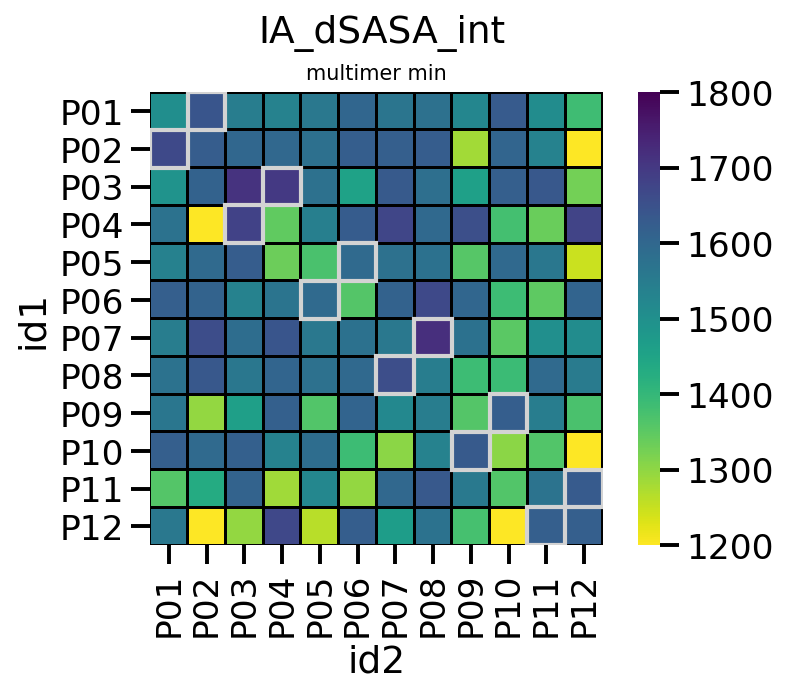

In [3]:
ranges_by_field = dict(
    mean_plddt = (75,100),
    IA_dSASA_int = (1200, 1800),
)
def plot(df, model_type, model_number, msa_depth, field, pdb, reverse_color_scale=False, annotate=False):
    if model_number.isnumeric():
        df = df.query(f'type=="{model_type}" and model=={model_number} and msa_depth=={msa_depth}')
        mat=df 
    else:
        df = df.query(f'type=="{model_type}" and msa_depth=={msa_depth}')
        mat = df.groupby('id1 id2'.split())
        
        #calls the mean, min, max function of mat group by
        mat = getattr(mat, model_number)()
        
    
    df = df.sort_values(by=field, ascending=True)
    id1 , id2 = pdb.split()
    print(id1, id2)    
    pdb_filt = df.query(f'id1 == "{id1}" and id2 == "{id2}"')
    
    for path in pdb_filt.full_name.values:
        print(f'load {path}')

    mat = mat.pivot_table(values=field, index='id1', columns='id2')

    if field in ranges_by_field:
        vmin, vmax = ranges_by_field[field]
    else:
        vmin, vmax = None, None
    
    if reverse_color_scale:
        cmap ='viridis_r'
    else:
        cmap='viridis'
    sns.heatmap(mat, cmap=cmap, linewidths=1, linecolor='black', annot=annotate, annot_kws={"size": 5}, fmt=".1f", vmin=vmin, vmax=vmax)
    plt.suptitle(field, y=1.01, fontsize=18)
    plt.title(f'{model_type} {model_number}', fontsize=10)
    
    ax = plt.gca()
    for i in [0,2,4,6,8,10]: 
        ax.add_patch( plt.Rectangle((i, i+1), 1, 1, fill=False, edgecolor='lightgray', lw=2) )
        ax.add_patch( plt.Rectangle((i+1, i), 1, 1, fill=False, edgecolor='lightgray', lw=2) )
    #return df
    ax.set_aspect('equal','box')
    

sns.set_context("talk")
plot(df, 'multimer', 'min', 512, 'IA_dSASA_int', 'P01 P02', True)

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
interact(plot, df=fixed(df), model_type=['monomer_ptm','multimer', 'multimer_v2'], 
model_number='1 2 3 4 5 min max mean median stdev'.split(),
msa_depth=[512,1],
field='mean_plddt mean_pae_interaction pTMscore elapsed_time IA_dG_cross IA_dSASA_int IA_dSASA_polar IA_sc_value IA_delta_unsatHbonds IA_nres_int IA_per_residue_energy_int IA_sc_value ptm iptm msa_depth\
   cms sc2 sc2_int_area sc2_median_dist vbuns sbuns score_per_res timed'.split(),
pdb='P01 P02', reverse_color_scale=False, annotate=False)

interactive(children=(Dropdown(description='model_type', options=('monomer_ptm', 'multimer', 'multimer_v2'), v…

<function __main__.plot(df, model_type, model_number, msa_depth, field, pdb, reverse_color_scale=False, annotate=False)>

In [5]:
grid = widgets.GridspecLayout(12, 12)
def on_btn_click(btn):
    print(btn.description)

for i in range(12):
    for j in range(12):
        grid[i, j] = widgets.Button(description="[P%d, P%d]"%(i,j), button_style="primary")

display(grid)

GridspecLayout(children=(Button(button_style='primary', description='[P0, P0]', layout=Layout(grid_area='widge…

In [12]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…